# Business Understanding

The company is interested in purchasing and operating airplanes for commercial and private enterprises.
This data will help the company determine which aircraft are the lowest risk for the company to acquire to start this new business endeavor.

# Data Understanding

To get the insights needed I will analyze the National Transportation Safety Board data set that includes data from 1962 to 2023 that includes information about civil aviation accidents and selected incidents in the US and internationally.

From this dataset I will focus on researching to the safest airplanes to fly as well as the newest generations of plane models that are the most reliable rather than the older options.
I will focus my analysis also on the accidents rate to find the planes with a clean flight record.

## Exploratory Data Analysis

In [65]:
#Start by importing the necessary libraries to analyze this data
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [8]:
#load the necessary csv dataframe
df = pd.read_csv('Aviation_Data.csv')

In [9]:
#time to explore the columns, size and content of the dataframe
#90,348 rows x 31 columns
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

(90348, 31)

In [10]:
#getting a first look of how the dataframe looks on the first 3 rows
df.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


## Data Cleaning

In [11]:
#looking for duplicates and inspecting them
df.duplicated().value_counts() 
df[df.duplicated(keep=False)].sort_values(by='Event.Id')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64030,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90004,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90090,NaN,20-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#removing duplicates
df=df.drop_duplicates()
df.shape  #1,447 duplicated entries removed

(88958, 31)

In [13]:
#changing the date to date time, this will help look for the 
#newer aircrafts
df['Event.Date']=pd.to_datetime(df['Event.Date'])
df['Event.Date']

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
90343   2022-12-26
90344   2022-12-26
90345   2022-12-26
90346   2022-12-26
90347   2022-12-29
Name: Event.Date, Length: 88958, dtype: datetime64[ns]

In [14]:
df['Event.Date']=df['Event.Date'].dt.strftime('%d-%m-%Y')

In [15]:
#determine the quantity of na in the dataframe per column
df.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

Given that there are too many na values, I will create a subset with the necessaty columns for my analysis.

In [16]:
#extracting only the year from the date
df['Year']=df['Event.Date'].str[-4:]

In [17]:
#dropping all the na from the year column to only have info for the events with dates
df=df.dropna(subset=['Year'])

In [18]:
df=df.loc[df['Year'].notna()]

In [23]:
df['Year']=df['Year'].astype(int)

To start the deep cleaning of this data I decided to create a subset with only the main columns I need to focus to analyze the data for the outcome needed.

In [24]:
#Subsetting: Year, Country, Injury.Severity, Aircraft.Damage, 
#Aircraft Category, Make, Model, Number of Engines, Engine Type, 
#Purpose of Flight, Total Fatal Injuries, Total Serious Injuries, 
#Total Minor Injuries, Total Uninjured, Weather Condition

subset = df[['Year', 'Country','Injury.Severity','Aircraft.damage', 'Aircraft.Category', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type','Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition']]

Subsetting only information from 1999 to 2022.

In [25]:
subset=subset[(df['Year']>=1999)&(df['Year']<=2022)]

In [26]:
#Adding the title.format to the columns so they match with other values
subset['Make']=subset['Make'].str.title()
subset['Country']=subset['Country'].str.title()

In [27]:
#drop the nas here because we need rows that contain this information
subset = subset.dropna(subset=['Aircraft.damage','Total.Uninjured','Total.Minor.Injuries','Total.Fatal.Injuries','Total.Serious.Injuries','Country','Injury.Severity', 'Make', 'Model' ])

In [28]:
#all of these makes of aircrafts need to have the category of airplane
subset.loc[subset['Make'] == ( 'Lake', 'Mooney', 'Raytheon','Lockheed','Bombardier','Douglas','Embraer','Piper','Cessna', 'Avions Max Holste', 'Beech', 'Air Tractor', 'Grumman American Avn. Corp.', 'Airbus', 'Boeing'), 'Aircraft.Category'] = 'Airplane'

In [29]:
#changing each 'make' of aircraft to the category airplane
subset.loc[subset['Make'] == ('Grumman American Avn.'), 'Aircraft.Category'] = 'Airplane'
subset.loc[subset['Make'] == ('Mooney'), 'Aircraft.Category'] = 'Airplane'
subset.loc[subset['Make'] == ('Luscombe'), 'Aircraft.Category'] = 'Airplane'
subset.loc[subset['Make'] == ('Rockwell'), 'Aircraft.Category'] = 'Airplane'
subset.loc[subset['Make'] == ('Lake'), 'Aircraft.Category'] = 'Airplane'
subset.loc[subset['Make'] == ('Gulfstream'), 'Aircraft.Category'] = 'Airplane'

In [30]:
#dropping the nas from category of aircraft
subset=subset.dropna(subset=['Aircraft.Category'])

In [31]:
#removing the country 'Un' from the dataframe
subset=subset[subset['Country']!='Un']

In [32]:
#na_rows = subset[subset['Aircraft.Category'].isna()]
#na_rows

In [351]:
subset.isna().sum()

Year                         0
Country                      0
Injury.Severity              0
Aircraft.damage           1030
Aircraft.Category            0
Make                         0
Model                        0
Number.of.Engines         2818
Engine.Type               4698
Purpose.of.flight         3444
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition         2958
dtype: int64

In [33]:
subset['Injury.Severity']= subset['Injury.Severity'].replace(to_replace=r'^Fatal.*', value='Fatal', regex=True)

In [34]:
subset['Injury.Severity']=subset['Injury.Severity'].replace(to_replace='Incident', value='Minor', regex=True)

In [35]:
subset['Aircraft.damage'].unique()

array(['Substantial', 'Destroyed', 'Minor', 'Unknown'], dtype=object)

In [36]:
#Dropping the value 'Unavailable' form injury severity
subset=subset[subset['Injury.Severity']!='Unavailable']

In [37]:
subset=subset[subset['Aircraft.damage']!='Unknown']

In [38]:
subset['Aircraft.damage'].value_counts()

Substantial    19539
Destroyed       2717
Minor            677
Name: Aircraft.damage, dtype: int64

In [39]:
subset['Number.of.Engines'].value_counts()
subset['Number.of.Engines'].unique()

array([ 1.,  2., nan,  4.,  3.,  0.,  8.,  6.])

In [40]:
#given that the most common number of engine is one I will replace the nan in this column with 1
subset['Number.of.Engines']=subset['Number.of.Engines'].fillna(1.)

In [41]:
subset['Engine.Type']=subset['Engine.Type'].fillna('Reciprocating')

In [42]:
subset=subset[subset['Engine.Type']!= 'Unknown']
subset=subset[subset['Engine.Type']!= 'None']
subset=subset[subset['Engine.Type']!= 'NONE']

In [43]:
subset['Purpose.of.flight']=subset['Purpose.of.flight'].fillna('Unknown')

In [44]:
subset['Weather.Condition']=subset['Weather.Condition'].str.upper()

In [45]:
subset['Weather.Condition'].value_counts()
subset['Weather.Condition']=subset['Weather.Condition'].fillna('UNK')

In [46]:
subset.isna().sum()

Year                      0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
dtype: int64

In [47]:
subset.shape

(22889, 15)

In [48]:
subset['Total.Injuries']=subset['Total.Fatal.Injuries']+subset['Total.Serious.Injuries']+subset['Total.Minor.Injuries']

In [50]:
subset = subset[subset['Number.of.Engines']!= 0.0]

In [51]:
subset=subset[subset['Aircraft.damage']!= 'Destroyed']
subset=subset[subset['Injury.Severity']!= 'Fatal']

In [52]:
subset=subset[subset['Engine.Type']!= 'LR']
subset=subset[subset['Engine.Type']!= 'UNK']
subset=subset[subset['Engine.Type']!= 'Geared Turbofan']
subset=subset[subset['Engine.Type']!= 'Electric']


In [53]:
subset['Injury.Severity'].value_counts()

Non-Fatal    16790
Minor          199
Serious        129
Name: Injury.Severity, dtype: int64

In [55]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17118 entries, 45472 to 90345
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    17118 non-null  int64  
 1   Country                 17118 non-null  object 
 2   Injury.Severity         17118 non-null  object 
 3   Aircraft.damage         17118 non-null  object 
 4   Aircraft.Category       17118 non-null  object 
 5   Make                    17118 non-null  object 
 6   Model                   17118 non-null  object 
 7   Number.of.Engines       17118 non-null  float64
 8   Engine.Type             17118 non-null  object 
 9   Purpose.of.flight       17118 non-null  object 
 10  Total.Fatal.Injuries    17118 non-null  float64
 11  Total.Serious.Injuries  17118 non-null  float64
 12  Total.Minor.Injuries    17118 non-null  float64
 13  Total.Uninjured         17118 non-null  float64
 14  Weather.Condition       17118 non-

In [57]:
convert_columns=['Number.of.Engines', 'Total.Fatal.Injuries',\
                 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Total.Injuries' ]

In [58]:
subset[convert_columns]=subset[convert_columns].astype(int)

In [59]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17118 entries, 45472 to 90345
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    17118 non-null  int64 
 1   Country                 17118 non-null  object
 2   Injury.Severity         17118 non-null  object
 3   Aircraft.damage         17118 non-null  object
 4   Aircraft.Category       17118 non-null  object
 5   Make                    17118 non-null  object
 6   Model                   17118 non-null  object
 7   Number.of.Engines       17118 non-null  int64 
 8   Engine.Type             17118 non-null  object
 9   Purpose.of.flight       17118 non-null  object
 10  Total.Fatal.Injuries    17118 non-null  int64 
 11  Total.Serious.Injuries  17118 non-null  int64 
 12  Total.Minor.Injuries    17118 non-null  int64 
 13  Total.Uninjured         17118 non-null  int64 
 14  Weather.Condition       17118 non-null  object
 15

# Data Analysis

*NEEDS TO BE EDITED* The goal of this project is for the company to get the less risky aircraft to start a new type of businness.
In order to get this list of less risky aircraft I would like to get a variable that will give me the output of that list of aircraft.


In [95]:
subset.sample(5) #starting the data analysis by checking a sample subset of aircrafts in the time range wanted

,Year,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Injuries
83665,2019,United States,Non-Fatal,Substantial,Airplane,Cessna,150,1,Reciprocating,Personal,0,0,0,1,VMC,0
69175,2010,United States,Non-Fatal,Substantial,Airplane,Piper,PA-22-150,1,Reciprocating,Personal,0,0,0,1,VMC,0
84024,2019,United States,Non-Fatal,Substantial,Glider,Stemme,S 10,1,Reciprocating,Personal,0,1,0,0,VMC,1
84229,2019,United States,Non-Fatal,Substantial,Helicopter,Bell,UH 1H,1,Turbo Shaft,External Load,0,0,0,2,VMC,0
70186,2011,United States,Non-Fatal,Substantial,Airplane,Waco Classic Aircraft,YMF-F5C,1,Reciprocating,Personal,0,0,0,1,VMC,0


In [92]:
#creating a subset of only the best aircraft to purchase
#total injuries needs to be 0, injuries include the sum of: serious ,fatal and minor injuries.
best_aircraft_subset = subset[(subset['Total.Injuries']== 0) & (subset['Aircraft.damage']== 'Minor')]
best_aircraft_subset.shape #checking the size of this new subset

(554, 16)

In [97]:
best_aircraft_subset['Make'].value_counts() #checking the best make of aircrafts based on this data analysis

Boeing                     152
Cessna                      74
Piper                       37
Beech                       22
Airbus                      21
                          ... 
Cessna Aircraft Company      1
2007 Savage Air Llc          1
Dornier                      1
Airbus Helicopters           1
Pilatus                      1
Name: Make, Length: 123, dtype: int64

In [86]:
#Getting subset samples to get a just examples for the graphs (trial)
subset_sample = subset.sample(n=10, replace=True)
best_aircraft_sample=best_aircraft_subset.sample(n=10, replace=True)

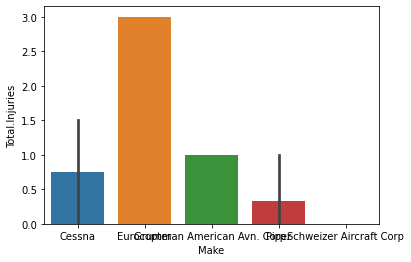

In [88]:
#bar plot TRIAL the total injuries per make, on a sample set of 10 rows.
sns.barplot(x=subset_sample['Make'], y=subset_sample['Total.Injuries'], data=df)
plt.show()


# Conclusions

To be completed...

## Limitations

## Recommendations

## Next Steps